In [278]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [279]:
df=pd.read_csv("titanic.csv")
df.head(2)
# target column - Survived -- Categorical, So classification models will be applied

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [280]:
df.info()
# challenges -- null values present and object datatype also present
# So, do null removal and encoding or preprocessing object datatype
# 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [281]:
(df.isnull().sum()/len(df))*100
# Cabin -- 77%
# Age -- 20%
# Embarked -- 0.22%
#--3% dropna() and drop the row
# 4%-40% --

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

<Axes: xlabel='Age', ylabel='Density'>

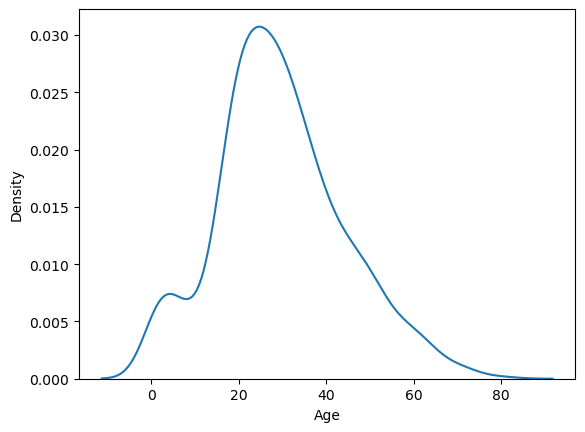

In [282]:
sns.kdeplot(df["Age"]) # skewness is there -- u will the missing values by median
# if skewness is not there then fill by mean.

In [283]:
d=df["Age"].median() # 28
df["Age"]=df["Age"].fillna(d)
df["Age"].isnull().sum()

0

In [284]:
df.drop("Cabin",axis=1,inplace=True)

In [285]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [286]:
df.dropna(inplace=True)

In [287]:
# Null processing completed

In [288]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [289]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S


In [290]:
# based on domain knowledge dropping
df.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)

In [291]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [292]:
# Handling Categorical Data
col_cate=df.select_dtypes("object")
col_cate

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
886,male,S
887,female,S
888,female,S
889,male,C


In [293]:
df["Sex"].value_counts()

Sex
male      577
female    312
Name: count, dtype: int64

In [294]:
df["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [295]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df[["Sex","Embarked"]]=oe.fit_transform(df[["Sex","Embarked"]])

In [296]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1.0,22.0,1,0,7.2500,2.0
1,1,1,0.0,38.0,1,0,71.2833,0.0
2,1,3,0.0,26.0,0,0,7.9250,2.0
3,1,1,0.0,35.0,1,0,53.1000,2.0
4,0,3,1.0,35.0,0,0,8.0500,2.0
...,...,...,...,...,...,...,...,...
886,0,2,1.0,27.0,0,0,13.0000,2.0
887,1,1,0.0,19.0,0,0,30.0000,2.0
888,0,3,0.0,28.0,1,2,23.4500,2.0
889,1,1,1.0,26.0,0,0,30.0000,0.0


In [297]:
# We are done with basic preprocessing
# Next analyzing data

In [298]:
df["Survived"].value_counts()

Survived
0    549
1    340
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

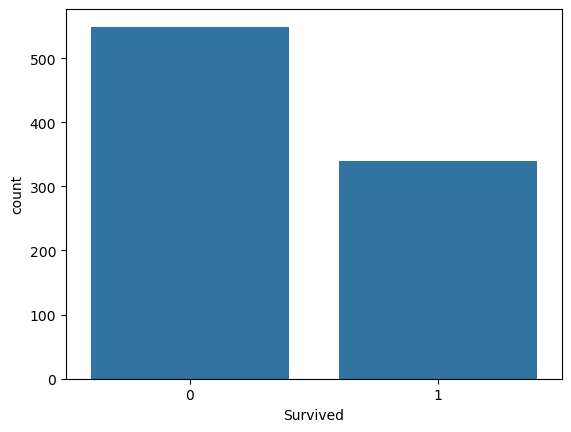

In [299]:
sns.countplot(data=df,x="Survived")
# target is impbalanced.
# there are less people who survived

<Axes: xlabel='Survived', ylabel='count'>

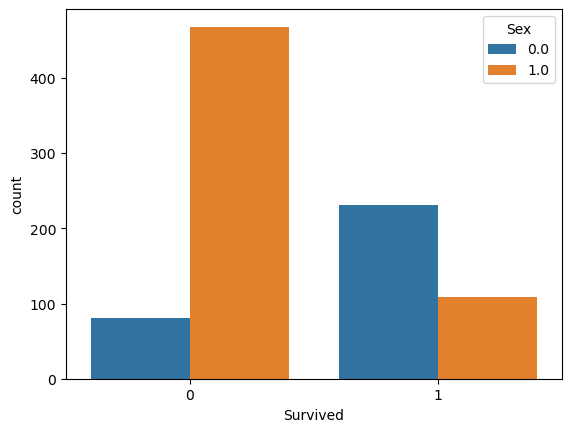

In [300]:
#------
sns.countplot(data=df,x="Survived",hue="Sex") # Gender is an important col for Survived prediction

<Axes: xlabel='Survived', ylabel='count'>

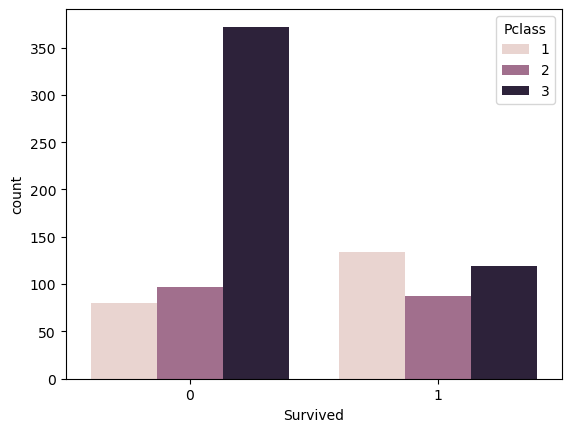

In [301]:
sns.countplot(data=df,x="Survived",hue="Pclass") 
# class 3 mostly dead
# class 1 mostly survived

<Axes: xlabel='Fare', ylabel='Density'>

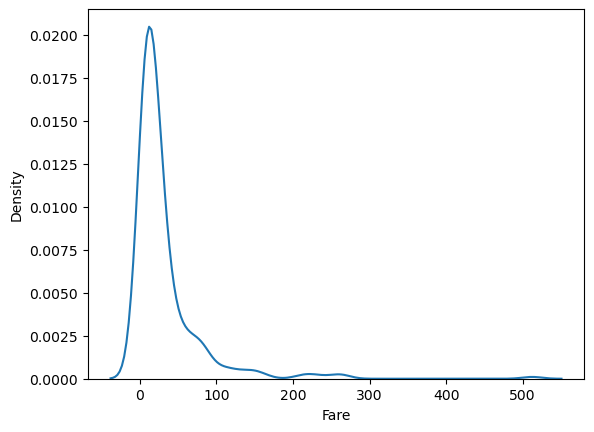

In [302]:
sns.kdeplot(df["Fare"]) # Fare has skewness

<Axes: xlabel='Survived', ylabel='count'>

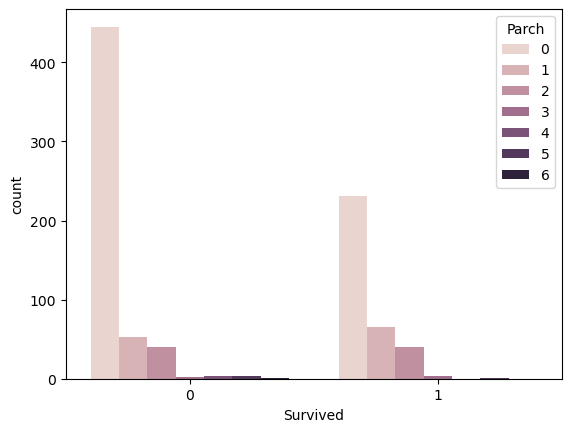

In [303]:
sns.countplot(data=df,x="Survived",hue="Parch") 
# Many people with 0 child are dead
# People with 1 children have a very little difference between those who are dead and survived.
# So this feature can be important when person has 0 child

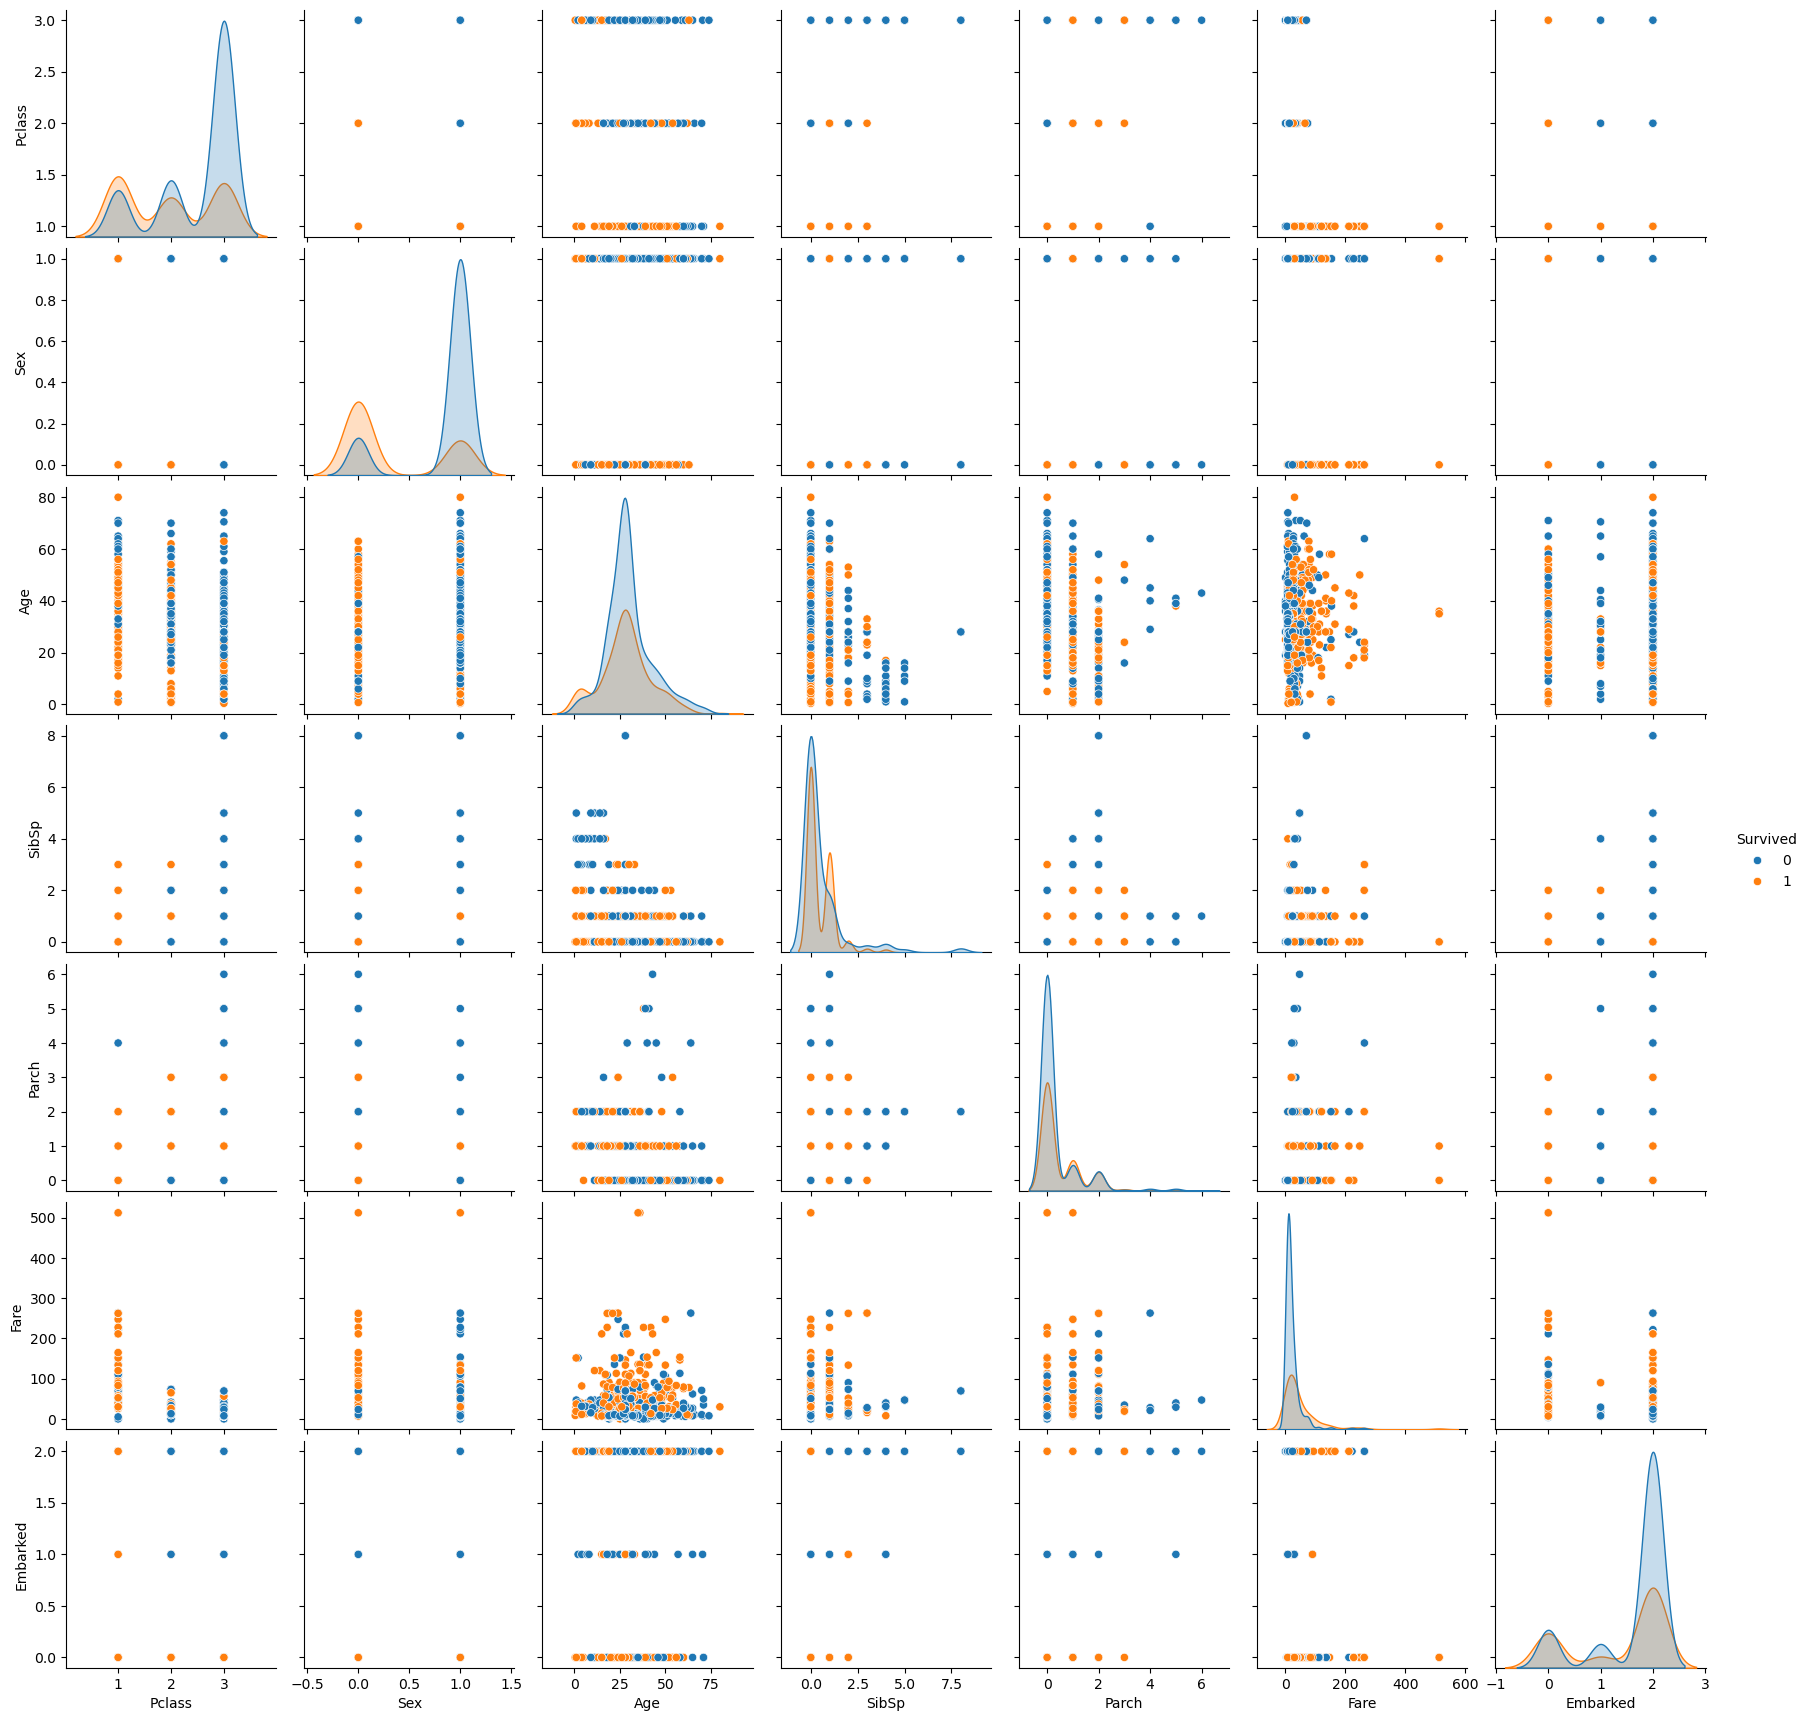

In [304]:
sns.pairplot(data=df,hue="Survived")

In [305]:
features=df.drop("Survived",axis=1)
target=df["Survived"]

In [306]:
from sklearn.model_selection import train_test_split
# putting stratify because target is imbalanced. 
xtrain,xtest,ytrain,ytest=train_test_split(features,target,random_state=10,test_size=0.25,stratify=target)
print(f"Training data : {xtrain.shape, ytrain.shape}" )
print(f"Testing data : {xtest.shape, ytest.shape}" )

Training data : ((666, 7), (666,))
Testing data : ((223, 7), (223,))


In [307]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

In [308]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
ac=accuracy_score(ytest,ypred)
cr=classification_report(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
print(f"Accuracy of Model : {ac}\nConfusion Matrix : \n{cm}\nClassification Report : \n{cr}")

Accuracy of Model : 0.8071748878923767
Confusion Matrix : 
[[118  20]
 [ 23  62]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       138
           1       0.76      0.73      0.74        85

    accuracy                           0.81       223
   macro avg       0.80      0.79      0.79       223
weighted avg       0.81      0.81      0.81       223



In [309]:
# for understanding overfitting underfitting
print(f"Training score : {lr.score(xtrain,ytrain)}")
print(f"Testing score : {lr.score(xtest,ytest)}")
# kind of underfitting

Training score : 0.7957957957957958
Testing score : 0.8071748878923767


In [310]:
print(f"Actual Values : {ytest[:25].values}")
print(f"Predic Values : {ypred[:25]}")

Actual Values : [0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1]
Predic Values : [1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1]


In [311]:
lr.predict_proba(xtest[:25])

array([[0.36296882, 0.63703118],
       [0.06922213, 0.93077787],
       [0.27868473, 0.72131527],
       [0.72170915, 0.27829085],
       [0.69498178, 0.30501822],
       [0.67861386, 0.32138614],
       [0.9183075 , 0.0816925 ],
       [0.80521423, 0.19478577],
       [0.2617196 , 0.7382804 ],
       [0.29616045, 0.70383955],
       [0.93539899, 0.06460101],
       [0.90824178, 0.09175822],
       [0.62793888, 0.37206112],
       [0.88091874, 0.11908126],
       [0.61644761, 0.38355239],
       [0.75457322, 0.24542678],
       [0.92444336, 0.07555664],
       [0.44432744, 0.55567256],
       [0.20868715, 0.79131285],
       [0.49313114, 0.50686886],
       [0.9046036 , 0.0953964 ],
       [0.83078471, 0.16921529],
       [0.0529587 , 0.9470413 ],
       [0.07056387, 0.92943613],
       [0.38643802, 0.61356198]])

In [312]:
from sklearn.metrics import roc_auc_score,roc_curve

In [313]:
ra=roc_auc_score(ytest,ypred)
ra

0.7922421142369992

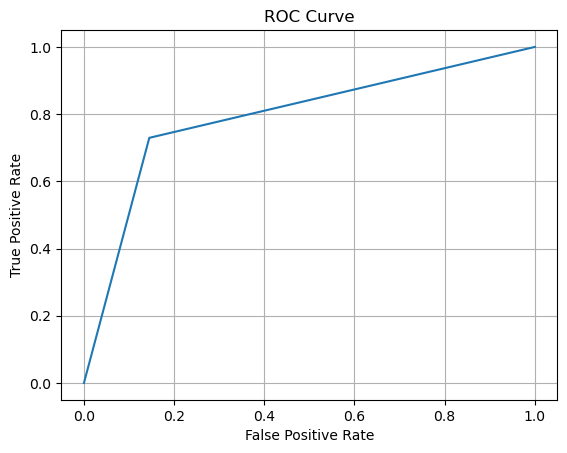

In [314]:
fpr,tpr,thres=roc_curve(ytest,ypred)
plt.plot(fpr,tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.show()

In [327]:
from sklearn.preprocessing import binarize
ypred_proba=lr.predict_proba(xtest)[:,1]
ypred=binarize([ypred_proba],threshold=0.3)[0]
ypred=ypred.astype(int)

In [328]:
print(f"Actual Values : {ytest[:25].values}")
print(f"Predic Values : {ypred[:25]}")

Actual Values : [0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1]
Predic Values : [1 1 1 0 1 1 0 0 1 1 0 0 1 0 1 0 0 1 1 1 0 0 1 1 1]


In [329]:
ra=roc_auc_score(ytest,ypred)
ra

0.7813299232736572

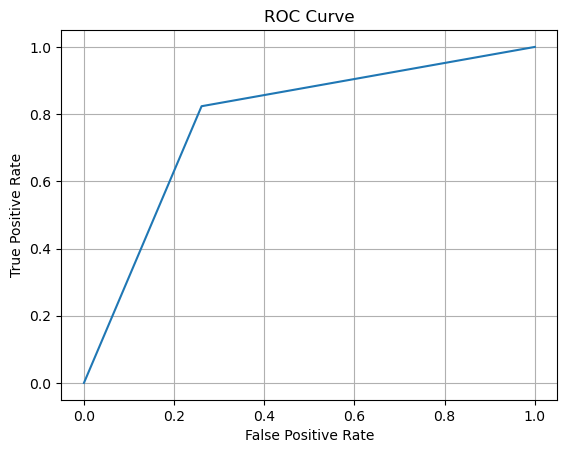

In [330]:
fpr,tpr,thres=roc_curve(ytest,ypred)
plt.plot(fpr,tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.show()

In [331]:
ac=accuracy_score(ytest,ypred)
cr=classification_report(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
print(f"Accuracy of Model : {ac}\nConfusion Matrix : \n{cm}\nClassification Report : \n{cr}")

Accuracy of Model : 0.7713004484304933
Confusion Matrix : 
[[102  36]
 [ 15  70]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.87      0.74      0.80       138
           1       0.66      0.82      0.73        85

    accuracy                           0.77       223
   macro avg       0.77      0.78      0.77       223
weighted avg       0.79      0.77      0.77       223



In [346]:
lr.predict_proba(xtest)[:,1]

array([0.63703118, 0.93077787, 0.72131527, 0.27829085, 0.30501822,
       0.32138614, 0.0816925 , 0.19478577, 0.7382804 , 0.70383955,
       0.06460101, 0.09175822, 0.37206112, 0.11908126, 0.38355239,
       0.24542678, 0.07555664, 0.55567256, 0.79131285, 0.50686886,
       0.0953964 , 0.16921529, 0.9470413 , 0.92943613, 0.61356198,
       0.16307156, 0.56861733, 0.05646866, 0.95343541, 0.27000778,
       0.14755058, 0.85521892, 0.8665697 , 0.86912097, 0.13390571,
       0.11978722, 0.09705076, 0.13313328, 0.08074701, 0.13716464,
       0.73506662, 0.95858451, 0.54237406, 0.61356198, 0.61365022,
       0.15004601, 0.88680553, 0.37955509, 0.77948342, 0.0953964 ,
       0.09523599, 0.61355058, 0.09543474, 0.38328968, 0.09182426,
       0.06472578, 0.20125788, 0.07524453, 0.96199553, 0.09543474,
       0.67800563, 0.23855813, 0.63566969, 0.58274929, 0.4807384 ,
       0.25339171, 0.92306388, 0.12454674, 0.0652595 , 0.54986341,
       0.33751184, 0.61700618, 0.79376477, 0.26982611, 0.14808

In [ ]:
# apply further models -- decision tree, random foprest